In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
df = pd.read_excel('Smoking/smoking_estimates_means.xlsx')
df_ci = pd.read_excel('Smoking/smoking_estimates_ci.xlsx')

In [3]:
df.head()

,Sex,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,"Annualized rate of change, 1996-2012",State & County,County,State
0,Male,34.5,33.9,33.8,33.7,33.7,34.3,33.2,36.2,36.4,...,35.4,33.8,29.5,29.3,27.6,26.6,-1.6,"Aleutians East Borough, AK",Aleutians East Borough,AK
1,Female,29.9,29.8,30.0,30.6,31.8,36.3,36.0,36.0,35.3,...,28.0,29.6,24.7,25.5,23.9,22.8,-1.7,"Aleutians East Borough, AK",Aleutians East Borough,AK
2,Both,32.2,31.8,31.9,32.1,32.7,35.3,34.6,36.1,35.9,...,31.6,31.7,27.1,27.4,25.7,24.6,-1.7,"Aleutians East Borough, AK",Aleutians East Borough,AK
3,Male,35.1,34.4,34.0,34.0,33.8,35.6,34.3,36.7,37.0,...,37.4,34.5,32.2,30.3,29.4,28.4,-1.3,"Aleutians West Census Area, AK",Aleutians West Census Area,AK
4,Female,28.0,28.1,28.1,30.1,31.3,34.2,34.7,34.0,33.6,...,27.7,26.7,23.6,24.2,25.2,24.2,-0.9,"Aleutians West Census Area, AK",Aleutians West Census Area,AK


In [4]:
df_both = df[df.Sex=='Both']

In [5]:
df_both.shape

(3127, 22)

In [6]:
df_both.head()

,Sex,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,"Annualized rate of change, 1996-2012",State & County,County,State
2,Both,32.2,31.8,31.9,32.1,32.7,35.3,34.6,36.1,35.9,...,31.6,31.7,27.1,27.4,25.7,24.6,-1.7,"Aleutians East Borough, AK",Aleutians East Borough,AK
5,Both,31.5,31.2,31.0,32.0,32.5,34.9,34.5,35.3,35.2,...,32.5,30.5,27.8,27.2,27.2,26.2,-1.1,"Aleutians West Census Area, AK",Aleutians West Census Area,AK
8,Both,24.5,24.1,24.0,23.9,24.0,24.1,24.0,23.7,23.2,...,19.8,18.7,18.8,18.7,19.8,19.1,-1.5,"Anchorage Municipality, AK",Anchorage Municipality,AK
11,Both,31.8,31.4,31.5,33.2,34.1,35.5,36.3,36.5,36.2,...,32.8,32.6,31.9,32.0,33.9,33.1,0.2,"Bethel Census Area, AK",Bethel Census Area,AK
14,Both,27.7,27.3,27.3,27.3,26.3,28.1,30.6,30.7,31.2,...,31.1,31.1,30.5,30.0,28.5,27.7,0.0,"Bristol Bay Borough, AK",Bristol Bay Borough,AK


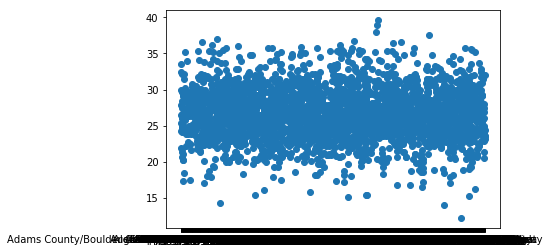

In [7]:
plt.scatter(df_both.County, df_both[1996])
#df_both[1996]
#df_both.columns

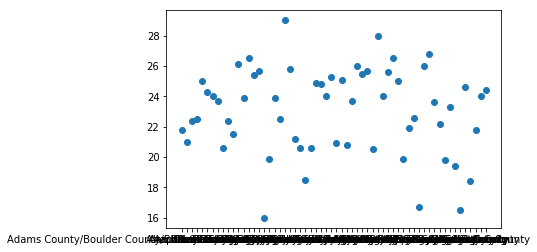

In [8]:
plt.scatter(df_both[df_both.State=='CO'].County,df_both[df_both.State=='CO'][1996])

In [9]:
mean_rates = []
for i in range(1996, 2012):
    mean_rates.append(df_both[i].mean())

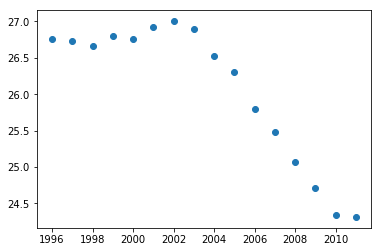

In [10]:
plt.scatter(range(1996, 2012), mean_rates)

In [11]:
max_increase = df_both['Annualized rate of change, 1996-2012'].sort_values().nlargest(10)
max_decrease = df_both['Annualized rate of change, 1996-2012'].sort_values().nsmallest(10)

In [12]:
max_decrease

8501   -4.1
653    -3.2
8375   -3.0
662    -3.0
8408   -2.9
542    -2.8
8372   -2.8
6002   -2.8
8315   -2.7
8102   -2.7
Name: Annualized rate of change, 1996-2012, dtype: float64

In [13]:
#df_both.loc[8501,[1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012]]
df_both.loc[8501,'County']

'Falls Church City'

In [14]:
max_increase = df_both[['State & County','Annualized rate of change, 1996-2012']].sort_values(by='Annualized rate of change, 1996-2012').nlargest(10, columns=['Annualized rate of change, 1996-2012'])
max_decrease = df_both[['State & County','Annualized rate of change, 1996-2012']].sort_values(by='Annualized rate of change, 1996-2012').nsmallest(10, columns=['Annualized rate of change, 1996-2012'])

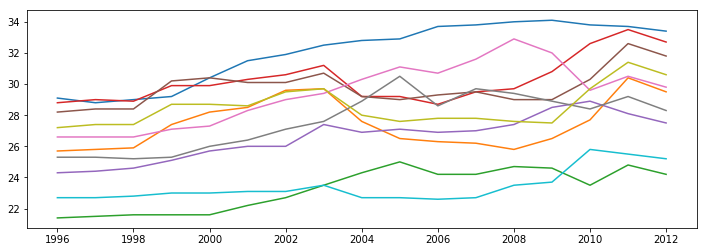

In [15]:
fig, ax = plt.subplots(figsize=(12,4))

for i in max_increase['State & County']:
    ax.plot(range(1996, 2013),df_both[df_both['State & County']==i].iloc[:,1:18].T)

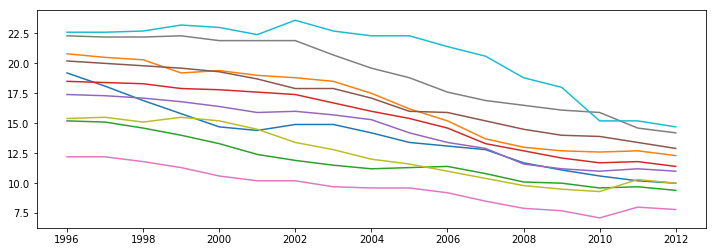

In [16]:
fig, ax = plt.subplots(figsize=(12,4))

for i in max_decrease['State & County']:
    ax.plot(range(1996, 2013),df_both[df_both['State & County']==i].iloc[:,1:18].T)

In [17]:
df_lung = pd.read_csv('/home/davidhenslovitz/Galvanize/ZNAHealth/CSV/RESPIR.csv', converters={'State-county recode': lambda x: str(x), 'CS Schema v0204+': lambda x: str(x)})

/home/davidhenslovitz/anaconda2/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,24,25,54,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
df_lung = df_lung.replace(r'\s+', np.nan, regex=True)

In [19]:
df_lung = df_lung[df_lung['CS Schema v0204+']=='063']

In [20]:
df_lung["state"] = df_lung["State-county recode"].str[0:2]

In [21]:
df_lung["county"] = df_lung["State-county recode"].str[2:5]

In [22]:
df_lung.state.value_counts()

26    124753
09     96775
53     92356
06     91814
19     84879
13     46302
35     29337
15     23842
49     17990
Name: state, dtype: int64

In [23]:
fips = pd.read_excel('FIPS.xlsx')

In [24]:
fips.FIPS = fips.FIPS.apply(lambda x: str(x).zfill(5))

In [25]:
fips.head()

,FIPS,Name,State
0,01001,Autauga,AL
1,01003,Baldwin,AL
2,01005,Barbour,AL
3,01007,Bibb,AL
4,01009,Blount,AL


In [26]:
# for i in df_lung["State-county recode"]:
#     state = fips[fips.FIPS==i]["Name"]

In [27]:
codes = list(df_lung["State-county recode"])
codes

['09009',
 '09009',
 '09009',
 '09001',
 '09009',
 '09009',
 '09009',
 '09003',
 '09003',
 '09003',
 '09007',
 '09011',
 '09011',
 '09015',
 '09009',
 '09011',
 '09011',
 '09003',
 '09003',
 '09001',
 '09009',
 '09009',
 '09009',
 '09005',
 '09003',
 '09003',
 '09003',
 '09003',
 '09003',
 '09003',
 '09009',
 '09001',
 '09003',
 '09003',
 '09001',
 '09009',
 '09009',
 '09009',
 '09009',
 '09009',
 '09001',
 '09001',
 '09001',
 '09003',
 '09001',
 '09001',
 '09009',
 '09011',
 '09001',
 '09013',
 '09003',
 '09003',
 '09003',
 '09009',
 '09007',
 '09001',
 '09009',
 '09003',
 '09003',
 '09005',
 '09003',
 '09003',
 '09001',
 '09007',
 '09001',
 '09015',
 '09009',
 '09001',
 '09011',
 '09013',
 '09011',
 '09003',
 '09009',
 '09009',
 '09009',
 '09009',
 '09009',
 '09005',
 '09001',
 '09003',
 '09009',
 '09001',
 '09003',
 '09001',
 '09003',
 '09001',
 '09001',
 '09001',
 '09001',
 '09001',
 '09001',
 '09001',
 '09009',
 '09009',
 '09009',
 '09009',
 '09005',
 '09009',
 '09009',
 '09009',


In [28]:
lst = []
lst2 = []
for i in codes:
    lst.append(fips[fips.FIPS==i]['Name'].values)
    lst2.append(fips[fips.FIPS==i]['State'].values)
# fips[fips.FIPS=='09009']['Name']

    

In [29]:
df_lung["County"] = lst
df_lung["County"] = df_lung["County"].str.get(0)
df_lung["State"] = lst2
df_lung["State"] = df_lung["State"].str.get(0)

In [31]:
df_lung.head(10)

,Patient ID number,Registry ID,Marital Status at DX,Race/Ethnicity,NHIA Derived Hispanic Origin,Sex,Age at diagnosis,Year of Birth,Sequence Number—Central,Month of diagnosis,...,CS Mets at Dx-Lung,T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),Total Number of In Situ/malignant Tumors for Patient,Total Number of Benign/Borderline Tumors for Patient,state,county,County,State
0,7000009,1502,2,1,0,1,81,1914,2,4,...,NaN,99,99,99,2,0,09,009,New Haven,CT
1,7000011,1502,2,1,0,1,88,1884,3,9,...,NaN,NaN,NaN,NaN,3,0,09,009,New Haven,CT
2,7000015,1502,2,1,0,1,76,1902,2,9,...,NaN,NaN,NaN,NaN,2,0,09,009,New Haven,CT
3,7000018,1502,2,1,0,2,64,1910,2,2,...,NaN,NaN,NaN,NaN,2,0,09,001,Fairfield,CT
4,7000023,1502,4,1,0,2,66,1924,2,1,...,NaN,99,99,10,2,0,09,009,New Haven,CT
5,7000048,1502,2,1,0,1,77,1897,2,2,...,NaN,NaN,NaN,NaN,2,0,09,009,New Haven,CT
6,7000049,1502,2,1,0,2,82,1923,2,3,...,NaN,NaN,NaN,NaN,2,0,09,009,New Haven,CT
7,7000054,1502,2,1,0,2,68,1909,2,1,...,NaN,NaN,NaN,NaN,2,0,09,003,Hartford,CT
8,7000055,1502,5,1,0,2,84,1900,2,6,...,NaN,NaN,NaN,NaN,2,0,09,003,Hartford,CT
9,7000061,1502,5,1,0,1,83,1925,2,8,...,NaN,NaN,NaN,NaN,2,0,09,003,Hartford,CT


In [58]:
df_lung["State_and_county"] = df_lung["County"]+" County, "+df_lung["State"]

In [59]:
df_lung.head()

,Patient ID number,Registry ID,Marital Status at DX,Race/Ethnicity,NHIA Derived Hispanic Origin,Sex,Age at diagnosis,Year of Birth,Sequence Number—Central,Month of diagnosis,...,T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),Total Number of In Situ/malignant Tumors for Patient,Total Number of Benign/Borderline Tumors for Patient,state,county,County,State,State_and_county
0,7000009,1502,2,1,0,1,81,1914,2,4,...,99,99,99,2,0,09,009,New Haven,CT,"New Haven County, CT"
1,7000011,1502,2,1,0,1,88,1884,3,9,...,NaN,NaN,NaN,3,0,09,009,New Haven,CT,"New Haven County, CT"
2,7000015,1502,2,1,0,1,76,1902,2,9,...,NaN,NaN,NaN,2,0,09,009,New Haven,CT,"New Haven County, CT"
3,7000018,1502,2,1,0,2,64,1910,2,2,...,NaN,NaN,NaN,2,0,09,001,Fairfield,CT,"Fairfield County, CT"
4,7000023,1502,4,1,0,2,66,1924,2,1,...,99,99,10,2,0,09,009,New Haven,CT,"New Haven County, CT"


In [148]:
counter = 0
lst = []
for i in df_lung["State_and_county"]:
    if (pd.isnull(i) or i not in list(df_both['State & County'].values)):
        lst.append(np.nan)
        
    else:
        ind = list(df_both['State & County'].values).index(i)
        lst.append(ind)
#     if counter > 1000:
#         break
    counter += 1
    
# arr = []
# for x in lst:
#     new_list = []
#     for year in range(1996,2013):
#         new_list.append(df_both.iloc[x][1:18][year])
#     arr.append(new_list)



# for yr in df_both.iloc[1][1:19].index:
#     df_lung[str(yr)] = [i[0] for i in arr]

In [150]:
print(lst[0])

302


In [151]:
arr = []
for x in lst:
    new_list = []
    for year in range(1996,2013):
        if np.isnan(x):
            new_list.append(np.nan)
        else:
            new_list.append(df_both.iloc[x][1:18][year])
    arr.append(new_list)

In [107]:
df_both.iloc[x][1:19][1999]

23.399999999999999

In [83]:
df_both.iloc[302][1:19][1996]

24.100000000000001

In [166]:
[i[16] for i in arr]

[19.100000000000001,
 19.100000000000001,
 19.100000000000001,
 14.9,
 19.100000000000001,
 19.100000000000001,
 19.100000000000001,
 17.899999999999999,
 17.899999999999999,
 17.899999999999999,
 17.399999999999999,
 18.800000000000001,
 18.800000000000001,
 21.100000000000001,
 19.100000000000001,
 18.800000000000001,
 18.800000000000001,
 17.899999999999999,
 17.899999999999999,
 14.9,
 19.100000000000001,
 19.100000000000001,
 19.100000000000001,
 19.199999999999999,
 17.899999999999999,
 17.899999999999999,
 17.899999999999999,
 17.899999999999999,
 17.899999999999999,
 17.899999999999999,
 19.100000000000001,
 14.9,
 17.899999999999999,
 17.899999999999999,
 14.9,
 19.100000000000001,
 19.100000000000001,
 19.100000000000001,
 19.100000000000001,
 19.100000000000001,
 14.9,
 14.9,
 14.9,
 17.899999999999999,
 14.9,
 14.9,
 19.100000000000001,
 18.800000000000001,
 14.9,
 16.199999999999999,
 17.899999999999999,
 17.899999999999999,
 17.899999999999999,
 19.100000000000001,
 17.39

In [177]:
counter = 0
for yr in df_both.iloc[1][1:18].index:
    df_lung[str(yr)] = [i[counter] for i in arr]
    counter += 1

In [184]:
df_lung.drop('Annualized rate of change, 1996-2012', axis=1, inplace=True)

In [185]:
df_lung.head()

,Patient ID number,Registry ID,Marital Status at DX,Race/Ethnicity,NHIA Derived Hispanic Origin,Sex,Age at diagnosis,Year of Birth,Sequence Number—Central,Month of diagnosis,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,7000009,1502,2,1,0,1,81,1914,2,4,...,24.0,23.4,22.8,22.7,22.5,22.2,21.3,20.9,19.8,19.1
1,7000011,1502,2,1,0,1,88,1884,3,9,...,24.0,23.4,22.8,22.7,22.5,22.2,21.3,20.9,19.8,19.1
2,7000015,1502,2,1,0,1,76,1902,2,9,...,24.0,23.4,22.8,22.7,22.5,22.2,21.3,20.9,19.8,19.1
3,7000018,1502,2,1,0,2,64,1910,2,2,...,19.6,19.1,18.6,17.7,17.1,16.6,15.9,15.1,15.4,14.9
4,7000023,1502,4,1,0,2,66,1924,2,1,...,24.0,23.4,22.8,22.7,22.5,22.2,21.3,20.9,19.8,19.1


In [192]:
df_first = df_lung[['Race/Ethnicity','Sex','Age at diagnosis', 'Year of Birth','CS Schema v0204+','Race recode (White, Black, Other)','Race recode (W, B, AI, API)','Origin recode NHIA (Hispanic, Non-Hisp)','State-county recode','state','county','County','State','State_and_county','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']]

In [1]:
df_first.shape

NameError: name 'df_first' is not defined

In [194]:
df_air = pd.read_csv('Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv')

In [195]:
df_pm2 = df_air[df_air.MeasureName=='Annual average ambient concentrations of PM 2.5 in micrograms per cubic meter, based on seasonal averages and daily measurement (monitor and modeled data)']

In [196]:
df_pm2['CountyFips'] = df_pm2['CountyFips'].apply(lambda x: str(x).zfill(5))

/home/davidhenslovitz/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [197]:
df_pm2 = df_pm2[['CountyFips', 'ReportYear','Value','UnitName']]

In [198]:
df_pm2.head()

,CountyFips,ReportYear,Value,UnitName
184435,01001,2001,13.186807,Micograms per cubic meter
184436,01001,2002,12.490668,Micograms per cubic meter
184437,01001,2003,12.869481,Micograms per cubic meter
184438,01001,2004,13.111945,Micograms per cubic meter
184439,01001,2005,13.543276,Micograms per cubic meter


In [328]:
df_test = df_first.iloc[:100]
df_pm2new = df_pm2.pivot(index='CountyFips', columns='ReportYear', values='Value')
#list(df_pm2new.index).index('01003')

In [329]:

lst = []
for i in df_test['State-county recode']:
    if (i not in list(df_pm2new.index)):
        lst.append(np.nan)
        
    else:
        ind = list(df_pm2new.index).index(i)
        lst.append(ind)

In [330]:
arr = []
for x in lst:
    new_list = []
    for col in df_pm2new.columns:
        if np.isnan(x):
            new_list.append(np.nan)
        else:
            new_list.append(df_pm2new.iloc[x][col])
    arr.append(new_list)

In [331]:
counter = 0
for col in df_pm2new.columns:
    df_test[str(col)+"air"] = [i[counter] for i in arr]
    counter += 1


/home/davidhenslovitz/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [332]:
#df_test.drop(['ReportYear', 'Value','UnitName','CountyFips'],axis=1, inplace=True)
df_test.head()

,Race/Ethnicity,Sex,Age at diagnosis,Year of Birth,CS Schema v0204+,"Race recode (White, Black, Other)","Race recode (W, B, AI, API)","Origin recode NHIA (Hispanic, Non-Hisp)",State-county recode,state,...,2002air,2003air,2004air,2005air,2006air,2007air,2008air,2009air,2010air,2011air
0,1,1,81,1914,063,1,1,0,09009,09,...,15.934345,16.695833,15.585533,14.469602,12.590142,12.025214,11.771350,10.101162,9.320940,10.457473
1,1,1,88,1884,063,1,1,0,09009,09,...,15.934345,16.695833,15.585533,14.469602,12.590142,12.025214,11.771350,10.101162,9.320940,10.457473
2,1,1,76,1902,063,1,1,0,09009,09,...,15.934345,16.695833,15.585533,14.469602,12.590142,12.025214,11.771350,10.101162,9.320940,10.457473
3,1,2,64,1910,063,1,1,0,09001,09,...,14.366319,14.054462,13.466459,13.887546,12.441102,11.775296,11.069675,9.468191,8.993251,11.043931
4,1,2,66,1924,063,1,1,0,09009,09,...,15.934345,16.695833,15.585533,14.469602,12.590142,12.025214,11.771350,10.101162,9.320940,10.457473


In [315]:
# df_pm2.groupby('CountyFips')


In [287]:
#df_pm2new.loc['01003']
df_pm2new.index

Index(['01001', '01003', '01005', '01007', '01009', '01011', '01013', '01015',
       '01017', '01019',
       ...
       '56027', '56029', '56031', '56033', '56035', '56037', '56039', '56041',
       '56043', '56045'],
      dtype='object', name='CountyFips', length=3109)

In [285]:
#True in [pd.isnull(i) for i in df_lung['State-county recode']]
df_pm2new.head()

ReportYear,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
CountyFips,,,,,,,,,,,
01001,13.186807,12.490668,12.869481,13.111945,13.543276,13.638252,14.542888,12.507304,10.279905,11.093826,11.106039
01003,11.803492,10.751602,12.124621,11.730904,12.540849,11.487688,11.658519,10.144779,9.144909,9.687065,9.599548
01005,12.364383,11.443971,11.531937,12.543327,12.787813,12.915748,14.095731,11.702072,10.480079,11.327428,10.793651
01007,13.944184,12.781192,13.162910,13.082518,14.310805,14.060887,14.206462,12.319946,9.992209,10.969478,11.035070
01009,16.032861,14.493547,14.722058,14.622386,15.809701,15.465637,16.052929,13.357497,10.911080,12.075522,11.630947
